In [48]:
import pandas as pd
import numpy as np
import tensorflow as tf
# import transformers
import matplotlib.pyplot as pl
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

from sklearn.preprocessing import LabelEncoder

In [7]:
df=pd.read_json('News_Category_Dataset_v2.json',lines=True)

In [9]:
df.head()

category                                           headline  \
0          CRIME  There Were 2 Mass Shootings In Texas Last Week...   
1  ENTERTAINMENT  Will Smith Joins Diplo And Nicky Jam For The 2...   
2  ENTERTAINMENT    Hugh Grant Marries For The First Time At Age 57   
3  ENTERTAINMENT  Jim Carrey Blasts 'Castrato' Adam Schiff And D...   
4  ENTERTAINMENT  Julianna Margulies Uses Donald Trump Poop Bags...   

           authors                                               link  \
0  Melissa Jeltsen  https://www.huffingtonpost.com/entry/texas-ama...   
1    Andy McDonald  https://www.huffingtonpost.com/entry/will-smit...   
2       Ron Dicker  https://www.huffingtonpost.com/entry/hugh-gran...   
3       Ron Dicker  https://www.huffingtonpost.com/entry/jim-carre...   
4       Ron Dicker  https://www.huffingtonpost.com/entry/julianna-...   

                                   short_description       date  
0  She left her husband. He killed their children... 2018-05-26  
1                           Of course it has a song. 2018-05-26  
2  The actor and his longtime girlfriend Anna Ebe... 2018-05-26  
3  The actor gives Dems an ass-kicking for not fi... 2018-05-26  
4  The "Dietland" actress said using the bags is ... 2018-05-26

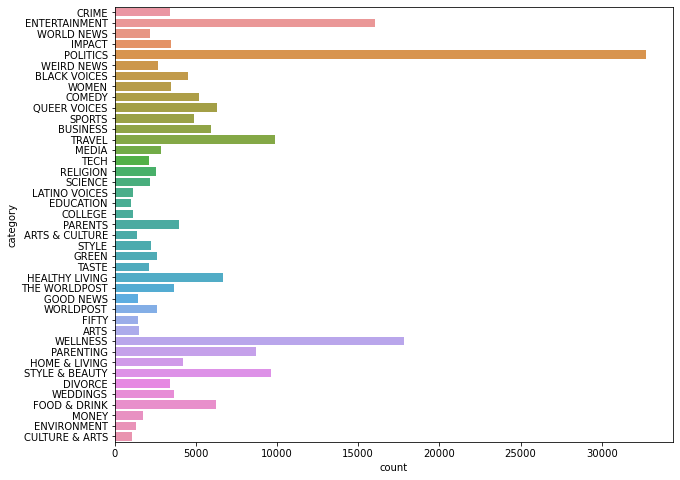

In [17]:
pl.figure(figsize=(10,8))
sns.countplot(y=df['category'])
          
pl.show()

In [20]:
df.category=df.category.map(lambda x: "WORLDPOST" if x=="THE WORLDPOST" else x)

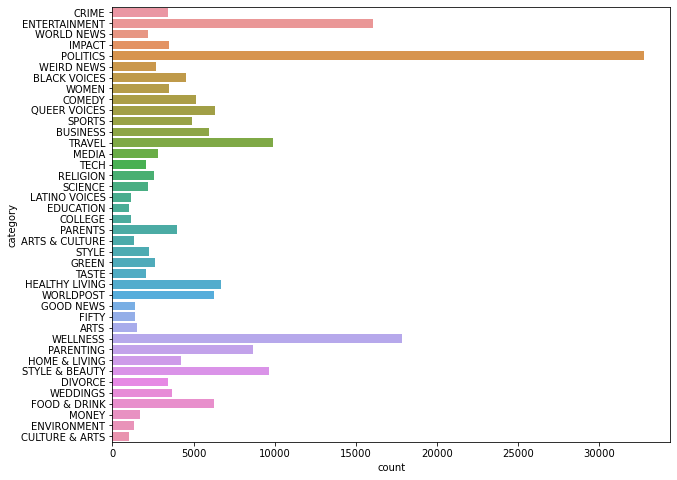

In [21]:
pl.figure(figsize=(10,8))
sns.countplot(y=df['category'])
          
pl.show()

In [23]:
print("Dataset contains %d unique values"%df.category.nunique())

Dataset contains 40 unique values


In [24]:
print(f"Dataset contains {df.category.nunique()} unique values")

Dataset contains 40 unique values


In [26]:
print("Dataset contains {} unique values".format(df.category.nunique()))

Dataset contains 40 unique values


In [28]:
encoder=LabelEncoder()
df['CategoryEncoded']=encoder.fit_transform(df['category'])
df.head()

category                                           headline  \
0          CRIME  There Were 2 Mass Shootings In Texas Last Week...   
1  ENTERTAINMENT  Will Smith Joins Diplo And Nicky Jam For The 2...   
2  ENTERTAINMENT    Hugh Grant Marries For The First Time At Age 57   
3  ENTERTAINMENT  Jim Carrey Blasts 'Castrato' Adam Schiff And D...   
4  ENTERTAINMENT  Julianna Margulies Uses Donald Trump Poop Bags...   

           authors                                               link  \
0  Melissa Jeltsen  https://www.huffingtonpost.com/entry/texas-ama...   
1    Andy McDonald  https://www.huffingtonpost.com/entry/will-smit...   
2       Ron Dicker  https://www.huffingtonpost.com/entry/hugh-gran...   
3       Ron Dicker  https://www.huffingtonpost.com/entry/jim-carre...   
4       Ron Dicker  https://www.huffingtonpost.com/entry/julianna-...   

                                   short_description       date  \
0  She left her husband. He killed their children... 2018-05-26   
1                           Of course it has a song. 2018-05-26   
2  The actor and his longtime girlfriend Anna Ebe... 2018-05-26   
3  The actor gives Dems an ass-kicking for not fi... 2018-05-26   
4  The "Dietland" actress said using the bags is ... 2018-05-26   

   CategoryEncoded  
0                6  
1               10  
2               10  
3               10  
4               10

In [35]:
df['headline']=df['headline'].apply(lambda x: str(x).lower())
df['short_description']=df['short_description'].apply(lambda x: str(x).lower())
df['headline_len']=df['headline'].apply(lambda x: len(x))
df['desc_len']=df['short_description'].apply(lambda x: len(x))
df.head()

category                                           headline  \
0          CRIME  there were 2 mass shootings in texas last week...   
1  ENTERTAINMENT  will smith joins diplo and nicky jam for the 2...   
2  ENTERTAINMENT    hugh grant marries for the first time at age 57   
3  ENTERTAINMENT  jim carrey blasts 'castrato' adam schiff and d...   
4  ENTERTAINMENT  julianna margulies uses donald trump poop bags...   

           authors                                               link  \
0  Melissa Jeltsen  https://www.huffingtonpost.com/entry/texas-ama...   
1    Andy McDonald  https://www.huffingtonpost.com/entry/will-smit...   
2       Ron Dicker  https://www.huffingtonpost.com/entry/hugh-gran...   
3       Ron Dicker  https://www.huffingtonpost.com/entry/jim-carre...   
4       Ron Dicker  https://www.huffingtonpost.com/entry/julianna-...   

                                   short_description       date  \
0  she left her husband. he killed their children... 2018-05-26   
1                           of course it has a song. 2018-05-26   
2  the actor and his longtime girlfriend anna ebe... 2018-05-26   
3  the actor gives dems an ass-kicking for not fi... 2018-05-26   
4  the "dietland" actress said using the bags is ... 2018-05-26   

   CategoryEncoded  headline_len  desc_len  
0                6            64        76  
1               10            75        24  
2               10            47        87  
3               10            69        86  
4               10            71        87

In [36]:
df.sort_values('headline_len',ascending=False).head(2)

category                                           headline  \
85746   BLACK VOICES  wendy williams announces 12-city ‘sit down tou...   
50290  ENTERTAINMENT  chats with esperanza spalding, michelle philli...   

                                                 authors  \
85746                                                      
50290  Mike Ragogna, ContributorTrafficbeat Entertain...   

                                                    link  \
85746  https://www.huffingtonpost.comhttp://www.eurwe...   
50290  https://www.huffingtonpost.com/entry/chats-wit...   

                                       short_description       date  \
85746  wendy williams is about to take her proverbial... 2015-07-13   
50290  dave mcgraw & mandy fer’s “creatures we are” e... 2016-08-19   

       CategoryEncoded  headline_len  desc_len  
85746                2           320        93  
50290               10           295       120

In [37]:
df.sort_values('desc_len',ascending=False).head(2)

category                          headline  \
58142    POLITICS                    sunday roundup   
101128  WORLDPOST  weekend roundup: laughing at god   

                                                  authors  \
58142                     Arianna Huffington, Contributor   
101128  Nathan Gardels, ContributorEditor-in-chief, Th...   

                                                     link  \
58142   https://www.huffingtonpost.com/entry/sunday-ro...   
101128  https://www.huffingtonpost.com/entry/weekend-r...   

                                        short_description       date  \
58142   this week the nation watched as the #nevertrum... 2016-05-22   
101128  the first principle of an open society is not ... 2015-01-17   

        CategoryEncoded  headline_len  desc_len  
58142                24            14      1472  
101128               39            32      1392

In [38]:
df.describe()

CategoryEncoded   headline_len       desc_len
count    200853.000000  200853.000000  200853.000000
mean         22.024366      57.940305     114.312686
std          10.753991      18.913850      82.288156
min           0.000000       0.000000       0.000000
25%          13.000000      45.000000      57.000000
50%          24.000000      59.000000     120.000000
75%          30.000000      71.000000     133.000000
max          39.000000     320.000000    1472.000000

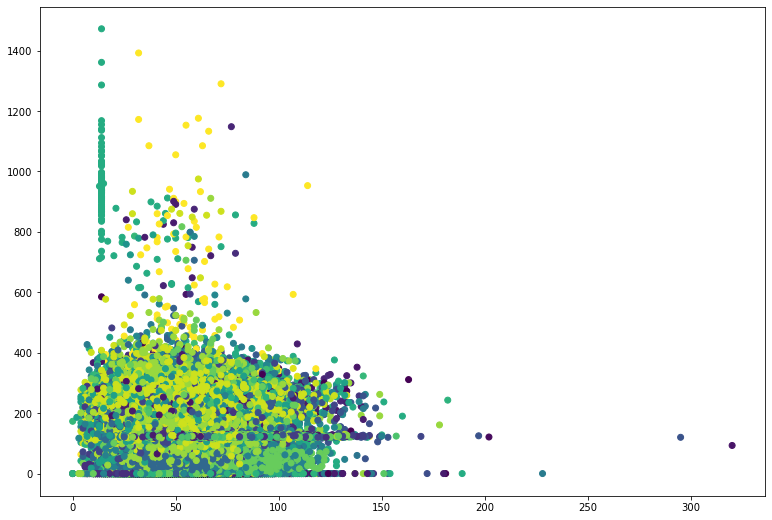

In [42]:
pl.figure(figsize=(13,9))
pl.scatter(df['headline_len'],df['desc_len'],c=df['CategoryEncoded'])
pl.show()

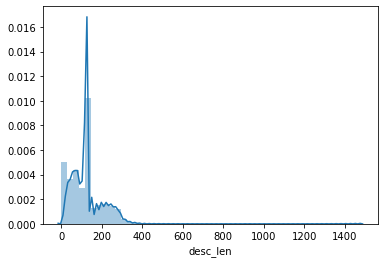

In [45]:
sns.distplot(df['desc_len'])

In [54]:
fig=go.Figure(go.Histogram(x=np.log(df['desc_len'])))
fig.show()

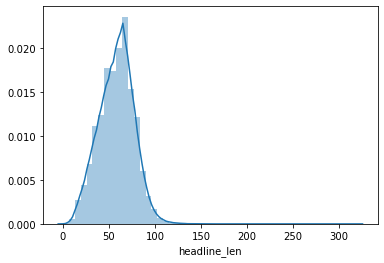

In [44]:
sns.distplot(df['headline_len'])

In [56]:
df['Full_Description']=df['headline']+df['short_description']
df.head().T

0  \
category                                                       CRIME   
headline           there were 2 mass shootings in texas last week...   
authors                                              Melissa Jeltsen   
link               https://www.huffingtonpost.com/entry/texas-ama...   
short_description  she left her husband. he killed their children...   
date                                             2018-05-26 00:00:00   
CategoryEncoded                                                    6   
headline_len                                                      64   
desc_len                                                          76   
Full_Description   there were 2 mass shootings in texas last week...   

                                                                   1  \
category                                               ENTERTAINMENT   
headline           will smith joins diplo and nicky jam for the 2...   
authors                                                Andy McDonald   
link               https://www.huffingtonpost.com/entry/will-smit...   
short_description                           of course it has a song.   
date                                             2018-05-26 00:00:00   
CategoryEncoded                                                   10   
headline_len                                                      75   
desc_len                                                          24   
Full_Description   will smith joins diplo and nicky jam for the 2...   

                                                                   2  \
category                                               ENTERTAINMENT   
headline             hugh grant marries for the first time at age 57   
authors                                                   Ron Dicker   
link               https://www.huffingtonpost.com/entry/hugh-gran...   
short_description  the actor and his longtime girlfriend anna ebe...   
date                                             2018-05-26 00:00:00   
CategoryEncoded                                                   10   
headline_len                                                      47   
desc_len                                                          87   
Full_Description   hugh grant marries for the first time at age 5...   

                                                                   3  \
category                                               ENTERTAINMENT   
headline           jim carrey blasts 'castrato' adam schiff and d...   
authors                                                   Ron Dicker   
link               https://www.huffingtonpost.com/entry/jim-carre...   
short_description  the actor gives dems an ass-kicking for not fi...   
date                                             2018-05-26 00:00:00   
CategoryEncoded                                                   10   
headline_len                                                      69   
desc_len                                                          86   
Full_Description   jim carrey blasts 'castrato' adam schiff and d...   

                                                                   4  
category                                               ENTERTAINMENT  
headline           julianna margulies uses donald trump poop bags...  
authors                                                   Ron Dicker  
link               https://www.huffingtonpost.com/entry/julianna-...  
short_description  the "dietland" actress said using the bags is ...  
date                                             2018-05-26 00:00:00  
CategoryEncoded                                                   10  
headline_len                                                      71  
desc_len                                                          87  
Full_Description   julianna margulies uses donald trump poop bags...